In [144]:
import pandas as pd
import numpy as np

 # Read Data

In [145]:
df=pd.read_csv('E:\\Desktop\\SLIIT\\colombo_rh_2012-2018.csv',parse_dates=True)

print('Shape of data',df.shape)
print ('\nNull values in data :\n',df.isnull().sum())
df.head()

Shape of data (4403, 7)

Null values in data :
 station_id       0
station_name     0
element_name     0
year             0
month            0
day              0
obs_val         20
dtype: int64


,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [146]:
df=df.dropna()
print('Shape of data',df.shape)
print ('\nNull values in data\n',df.isnull().sum())
df.head()

Shape of data (4383, 7)

Null values in data
 station_id      0
station_name    0
element_name    0
year            0
month           0
day             0
obs_val         0
dtype: int64


,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [147]:
#finding the unique values present
print(df['element_name'].unique())
print(df['year'].unique())

['RHMAX' 'RHMIN']
[2012 2013 2014 2015 2016 2017 2018]


In [148]:
#max relative hmidity is recorded for years 2012-2018
df[df['element_name'] == 'RHMAX']['year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [149]:
#but min relative hmidity is recorded only for years 2015-2018
df[df['element_name'] == 'RHMIN']['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [150]:
#making the date column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

df.head()

,station_id,station_name,element_name,year,month,day,obs_val,date
0,43466,COLOMBO,RHMAX,2012,1,1,91.0,2012-01-01
1,43466,COLOMBO,RHMAX,2012,1,2,90.0,2012-01-02
2,43466,COLOMBO,RHMAX,2012,1,3,89.0,2012-01-03
3,43466,COLOMBO,RHMAX,2012,1,4,89.0,2012-01-04
4,43466,COLOMBO,RHMAX,2012,1,5,95.0,2012-01-05


In [151]:
df1 = df.drop(['station_id', 'station_name','year', 'month', 'day'], axis=1)
df1 = df1.set_index('date')
df1.head()

,element_name,obs_val
date,,
2012-01-01,RHMAX,91.0
2012-01-02,RHMAX,90.0
2012-01-03,RHMAX,89.0
2012-01-04,RHMAX,89.0
2012-01-05,RHMAX,95.0


In [152]:
df1.loc['2015-01-01']

,element_name,obs_val
date,,
2015-01-01,RHMAX,94.0
2015-01-01,RHMIN,76.0


In [153]:
df1.loc['2012-01-01']

element_name    RHMAX
obs_val          91.0
Name: 2012-01-01 00:00:00, dtype: object

In [154]:
def get_avg_relhum(df, idx):
   
    rhmin_mean = df.loc[df['element_name'] == 'RHMIN', 'obs_val'].mean()
    rhmin_mean=round(rhmin_mean,2)
    
    # Get the values in the 'rhmax' and 'rhmin' columns for the given index
    rhmax = df.loc[(df.index == idx) & (df['element_name'] == 'RHMAX'), 'obs_val']
    rhmin = df.loc[(df.index == idx) & (df['element_name'] == 'RHMIN'), 'obs_val']
    
    # If both 'rhmax' and 'rhmin' values are present, calculate the average
    if not rhmax.empty and not rhmin.empty:
        avg_rh = (rhmax.iloc[0] + rhmin.iloc[0]) / 2.0
        avg_rh = round(avg_rh, 2)
    # Otherwise, use the 'rhmax' value as the average
    else:
        avg_rh=(rhmax.iloc[0] + rhmin_mean) / 2.0
        avg_rh = round(avg_rh, 2)
    
    return avg_rh


In [155]:
#testing the function
get_avg_relhum(df1,'2015-01-01')

85.0

In [156]:
get_avg_relhum(df1,'2012-01-01')

82.6

In [157]:
get_avg_relhum(df1,'2018-11-16')

82.0

In [158]:
# Creating a new column 'avg_rh' and apply the 'get_avg_relhum()' function to each index
df1['avg_rh'] = df1.index.map(lambda x: get_avg_relhum(df1, x))
df1.head()

,element_name,obs_val,avg_rh
date,,,
2012-01-01,RHMAX,91.0,82.6
2012-01-02,RHMAX,90.0,82.1
2012-01-03,RHMAX,89.0,81.6
2012-01-04,RHMAX,89.0,81.6
2012-01-05,RHMAX,95.0,84.6


In [159]:
#as you can see both max and min RH has the same average RH
df1.loc['2015-01-01']

,element_name,obs_val,avg_rh
date,,,
2015-01-01,RHMAX,94.0,85.0
2015-01-01,RHMIN,76.0,85.0


In [160]:
df1.loc['2018-11-16']

,element_name,obs_val,avg_rh
date,,,
2018-11-16,RHMAX,90.0,82.0
2018-11-16,RHMIN,74.0,82.0
2018-11-16,RHMAX,90.0,82.0


In [161]:
df1.loc['2012-01-01']

element_name    RHMAX
obs_val          91.0
avg_rh           82.6
Name: 2012-01-01 00:00:00, dtype: object

In [162]:
def check_duplicate_index(df):
    years = range(2012, 2019)
    for year in years:
        year_df = df[df.index.year == year]
        if year_df.index.duplicated().any():
            print(f"Duplicate index found for year {year}")

In [163]:
check_duplicate_index(df1)

Duplicate index found for year 2015
Duplicate index found for year 2016
Duplicate index found for year 2017
Duplicate index found for year 2018


In [164]:

print('Shape of data',df1.shape)
df1.loc['2018-12-31']

Shape of data (4383, 3)


,element_name,obs_val,avg_rh
date,,,
2018-12-31,RHMAX,82.0,74.5
2018-12-31,RHMIN,67.0,74.5
2018-12-31,RHMAX,82.0,74.5


In [165]:
print(df1.loc['2017-12-31'])
print(df1.loc['2018-01-01'])
#RHMAX year 2018 has been repeated again

           element_name  obs_val  avg_rh
date                                    
2017-12-31        RHMAX     85.0    73.5
2017-12-31        RHMIN     62.0    73.5
           element_name  obs_val  avg_rh
date                                    
2018-01-01        RHMAX     88.0    74.5
2018-01-01        RHMIN     61.0    74.5
2018-01-01        RHMAX     88.0    74.5


In [166]:
RH_counts = df1['element_name'].value_counts()

print(RH_counts)

element_name
RHMAX    2922
RHMIN    1461
Name: count, dtype: int64


In [167]:

year_list = [2012, 2013, 2014, 2015,2016,2017,2018]
df_filtered = df1[(df1['element_name'] == 'RHMAX') & (df1.index.year.isin(year_list))]
df_filtered.index.year.value_counts()




date
2018    730
2012    366
2016    366
2013    365
2014    365
2015    365
2017    365
Name: count, dtype: int64

In [168]:
df1

,element_name,obs_val,avg_rh
date,,,
2012-01-01,RHMAX,91.0,82.6
2012-01-02,RHMAX,90.0,82.1
2012-01-03,RHMAX,89.0,81.6
2012-01-04,RHMAX,89.0,81.6
2012-01-05,RHMAX,95.0,84.6
...,...,...,...
2018-12-27,RHMAX,90.0,83.0
2018-12-28,RHMAX,88.0,80.5
2018-12-29,RHMAX,76.0,72.0


In [169]:
# Reset the index to a sequential integer index
df2 = df1.reset_index(drop=False)
print('Shape of data',df2.shape)
df2.head()



Shape of data (4383, 4)


,date,element_name,obs_val,avg_rh
0,2012-01-01,RHMAX,91.0,82.6
1,2012-01-02,RHMAX,90.0,82.1
2,2012-01-03,RHMAX,89.0,81.6
3,2012-01-04,RHMAX,89.0,81.6
4,2012-01-05,RHMAX,95.0,84.6


In [170]:
df2.loc[df2['date'] == '2018-12-31'] #getting the index to delete duplicated rows

,date,element_name,obs_val,avg_rh
2921,2018-12-31,RHMAX,82.0,74.5
4017,2018-12-31,RHMIN,67.0,74.5
4382,2018-12-31,RHMAX,82.0,74.5


In [171]:
#removing duplicated year 2018
df3 = df2.loc[0:2921]
print('Shape of data',df3.shape)
df3.loc[df3['date'] == '2018-12-31']

Shape of data (2922, 4)


,date,element_name,obs_val,avg_rh
2921,2018-12-31,RHMAX,82.0,74.5


In [172]:
df3

,date,element_name,obs_val,avg_rh
0,2012-01-01,RHMAX,91.0,82.6
1,2012-01-02,RHMAX,90.0,82.1
2,2012-01-03,RHMAX,89.0,81.6
3,2012-01-04,RHMAX,89.0,81.6
4,2012-01-05,RHMAX,95.0,84.6
...,...,...,...,...
2917,2018-12-27,RHMAX,90.0,83.0
2918,2018-12-28,RHMAX,88.0,80.5
2919,2018-12-29,RHMAX,76.0,72.0
2920,2018-12-30,RHMAX,81.0,68.0


In [173]:
 #total number of days between 2012-2018= 2557, but we have 2922 rows here
df3.loc[df3['date'] == '2015-12-31']

,date,element_name,obs_val,avg_rh
1460,2015-12-31,RHMAX,85.0,74.0
1825,2015-12-31,RHMIN,63.0,74.0


In [174]:
#removing duplicated year 2015, we only need to remove the rows with value 'RHMIN' for element_name colmn
count = df3['element_name'].value_counts()['RHMIN'] #getting the count to make sure only 2015 year has 'RHMIN'
count

365

In [175]:
#removing those rows
df3 = df3[df3['element_name'] != 'RHMIN']
df3

,date,element_name,obs_val,avg_rh
0,2012-01-01,RHMAX,91.0,82.6
1,2012-01-02,RHMAX,90.0,82.1
2,2012-01-03,RHMAX,89.0,81.6
3,2012-01-04,RHMAX,89.0,81.6
4,2012-01-05,RHMAX,95.0,84.6
...,...,...,...,...
2917,2018-12-27,RHMAX,90.0,83.0
2918,2018-12-28,RHMAX,88.0,80.5
2919,2018-12-29,RHMAX,76.0,72.0
2920,2018-12-30,RHMAX,81.0,68.0


In [176]:
df3 = df3.reset_index(drop=True)
df3

,date,element_name,obs_val,avg_rh
0,2012-01-01,RHMAX,91.0,82.6
1,2012-01-02,RHMAX,90.0,82.1
2,2012-01-03,RHMAX,89.0,81.6
3,2012-01-04,RHMAX,89.0,81.6
4,2012-01-05,RHMAX,95.0,84.6
...,...,...,...,...
2552,2018-12-27,RHMAX,90.0,83.0
2553,2018-12-28,RHMAX,88.0,80.5
2554,2018-12-29,RHMAX,76.0,72.0
2555,2018-12-30,RHMAX,81.0,68.0


In [177]:
df3.loc[df3['date'] == '2015-01-01']

,date,element_name,obs_val,avg_rh
1096,2015-01-01,RHMAX,94.0,85.0


In [178]:
df3 = df3.set_index('date')
columns_to_drop = ['element_name', 'obs_val']  # list of column names to drop
df4 = df3.drop(columns=columns_to_drop) 
df4

,avg_rh
date,
2012-01-01,82.6
2012-01-02,82.1
2012-01-03,81.6
2012-01-04,81.6
2012-01-05,84.6
...,...
2018-12-27,83.0
2018-12-28,80.5
2018-12-29,72.0


# Plot Your Data

<AxesSubplot:xlabel='date'>

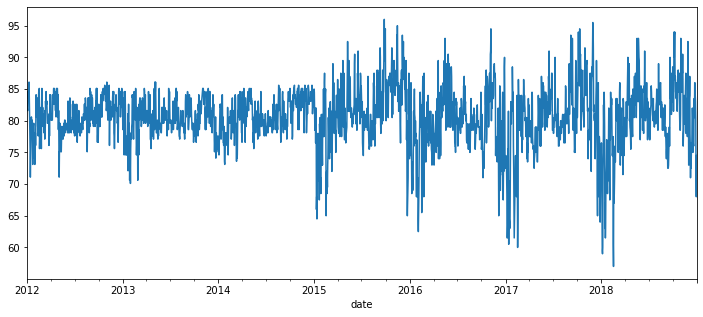

In [179]:
df4['avg_rh'].plot(figsize=(12,5))
#stationary? const mean, const var, no seasonality; seems almost stationary

# Check For Stationarity using ADF test

In [180]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)
  if dftest[1] < 0.05:
    print("Data is stationary")
  else:
    print("Data is not stationary")

In [181]:
adf_test(df4['avg_rh'])
#pvalue < 0.05, therefore data is stationary

1. ADF :  -7.083601380350913
2. P-Value :  4.598782067390293e-10
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2539
5. Critical Values :
	 1% :  -3.432928150289924
	 5% :  -2.862679020794315
	 10% :  -2.5673763435766364
Data is stationary


In [182]:
from statsmodels.tsa.stattools import kpss

kpss_stat, p_value, lags, critical_values = kpss(df4['avg_rh'], nlags='auto')

# Print test results
print(f'KPSS test statistic: {kpss_stat:.4f}')
print(f'p-value: {p_value:.4f}')
print(f'Lags used: {lags}')
print('Critical values:')
for key, value in critical_values.items():
    print(f'   {key}: {value:.4f}')
if p_value <= 0.05:
    print ("data not stationary")
else:
    print ("data is stationary")


KPSS test statistic: 0.0721
p-value: 0.1000
Lags used: 26
Critical values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
data is stationary


E:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [183]:
import statsmodels.stats.stattools as st

# Perform the Durbin-Watson test to check if there's seasoality
dw = st.durbin_watson(df4['avg_rh'])

# Print the results of the test.
print('Durbin-Watson test:', dw)

Durbin-Watson test: 0.001891940779220712


strong positive auto correlation [close to zero] indicating that there is seasonal patterns in the data

# Figure Out Order for ARIMA Model

E:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


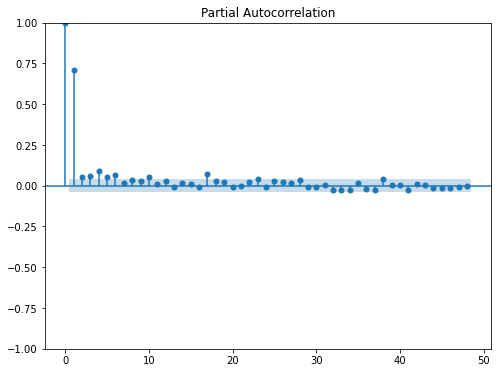

In [184]:
import statsmodels.graphics.tsaplots as tsa_plots
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))

# Plot the PACF for seasonally diff data
tsa_plots.plot_pacf(df4['avg_rh'], lags=48, ax=plt.gca())
# Show the plot
plt.show()

p=1

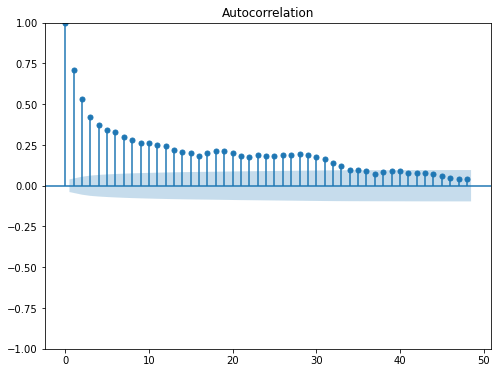

In [185]:
fig = plt.figure(figsize=(8, 6))

# Plot the PACF for seasonally diff data
tsa_plots.plot_acf(df4['avg_rh'], lags=48, ax=plt.gca())
# Show the plot
plt.show()

q=0, and since there is no upward trend: d=0

E:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


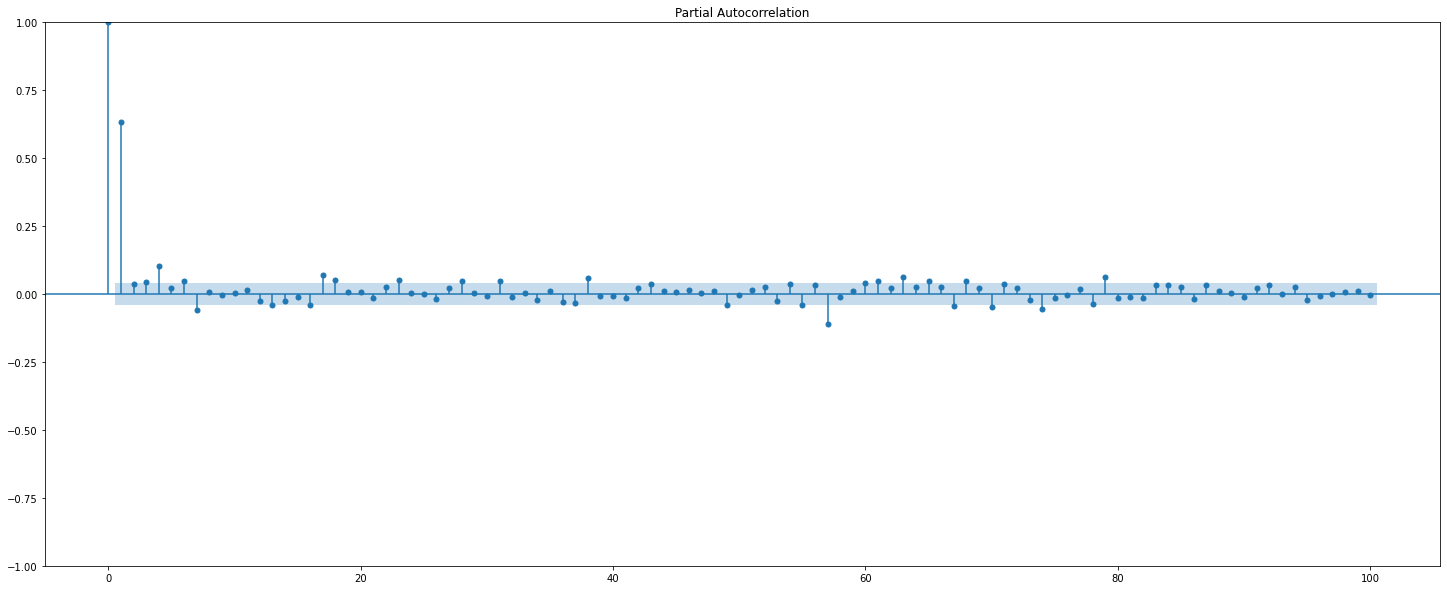

In [186]:
from statsmodels.tsa.statespace.tools import diff 
#differentiating by seasonal periods
diffdvds=diff(df4, k_diff=0, k_seasonal_diff=True, seasonal_periods=365)
#diffdvds
import statsmodels.api as sm
# Create a figure and set the figure size
fig = plt.figure(figsize=(25, 10))

# Plot the PACF for seasonally diff data
sm.graphics.tsa.plot_pacf(diffdvds['avg_rh'], lags=100, ax=plt.gca())

# Show the plot
plt.show()

P=1

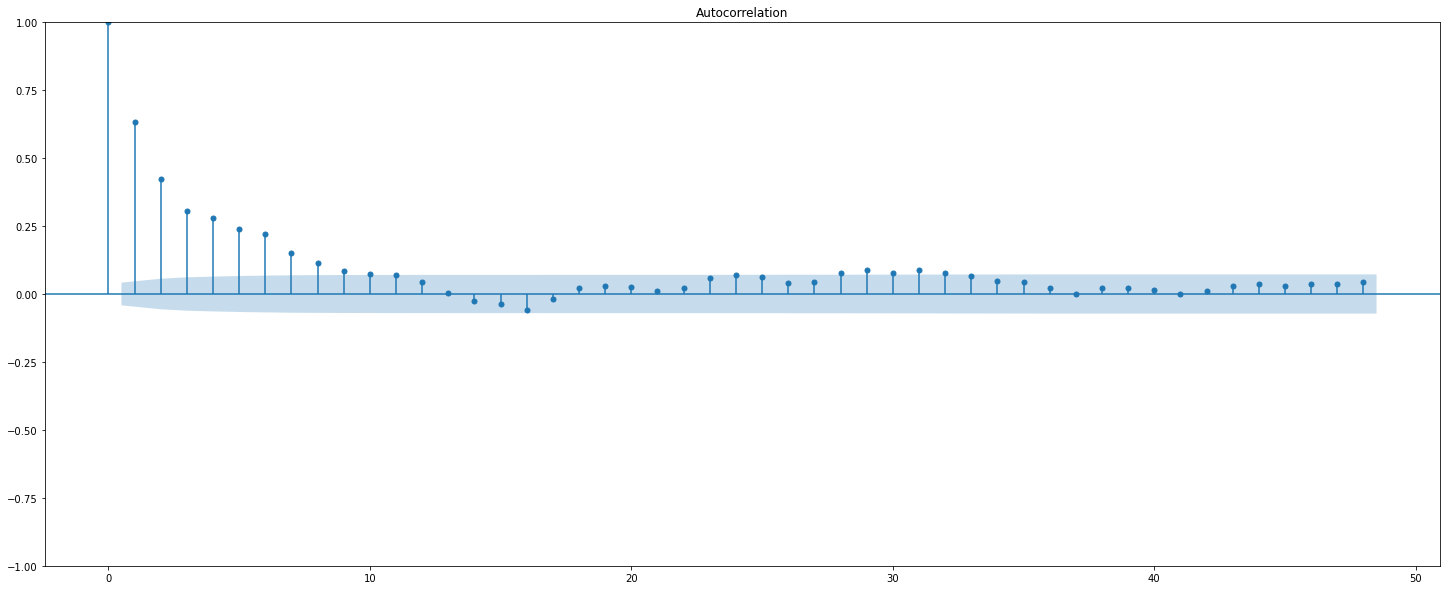

In [187]:
fig = plt.figure(figsize=(25, 10))
# Plot the PACF for seasonally diff data
sm.graphics.tsa.plot_acf(diffdvds['avg_rh'], lags=48, ax=plt.gca())
plt.show()

D=1 period = 365, Q=0/7/8 but using period = 12 to mke the model simpler

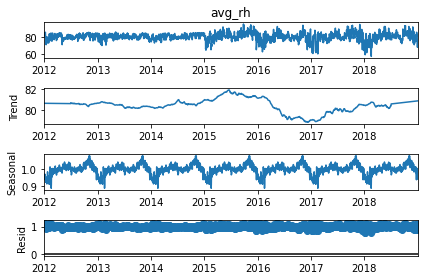

In [188]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df4['avg_rh'], model='multiplicative',extrapolate_trend='freq',period=365)
result.plot()
plt.show()

seasonal plot shows pattern, indicating seasonality

In [131]:
from pmdarima.arima import auto_arima

# Fit auto_arima on the training data
model = auto_arima(df4['avg_rh'], seasonal=True, m=12, suppress_warnings=True)

# Print the optimal order and seasonal_order
print(f"Optimal Order: {model.order}")
print(f"Optimal Seasonal Order: {model.seasonal_order}")

E:\anaconda\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,0,0)(2,0,0)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "E:\anaconda\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "E:\anaconda\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "E:\anaconda\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "E:\anaconda\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "E:\anaconda\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "E:\anaconda\lib\site-packages\statsmodels\base\model.py", line 563, in fit
    xop

Optimal Order: (2, 0, 0)
Optimal Seasonal Order: (1, 0, 0, 12)


# Split Data into Training and Testing

In [189]:
train=df4.iloc[:-30]
test=df4.iloc[-30:]
print(train.shape,test.shape)
print("train ==>",train.iloc[0],"\n",train.iloc[-1])
print("test ==>",test.iloc[0],"\n",test.iloc[-1])

(2527, 1) (30, 1)
train ==> avg_rh    82.6
Name: 2012-01-01 00:00:00, dtype: float64 
 avg_rh    73.0
Name: 2018-12-01 00:00:00, dtype: float64
test ==> avg_rh    73.0
Name: 2018-12-02 00:00:00, dtype: float64 
 avg_rh    74.5
Name: 2018-12-31 00:00:00, dtype: float64


## Train the Model

Using auto arima order

<AxesSubplot:xlabel='date'>

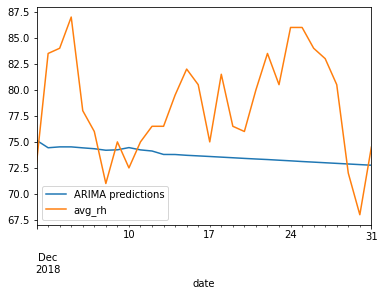

In [192]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
train.index.freq = 'D'

# Fit ARIMA model
model = SARIMAX(train['avg_rh'], order=(2, 0, 0), seasonal_order=(1, 0, 0, 12))

model_fit = model.fit()
start=len(train)
end=len(train)+len(test)-1

#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-02',end='2018-12-31')
pred=model_fit.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['avg_rh'].plot(legend=True)

Using the order acquired by acf and pacf plots

In [194]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
train.index.freq = 'D'

# Fit ARIMA model
model = SARIMAX(train['avg_rh'], order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))

model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             avg_rh   No. Observations:                 2527
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood               -6973.702
Date:                            Sun, 07 May 2023   AIC                          13953.404
Time:                                    18:19:41   BIC                          13970.894
Sample:                                01-01-2012   HQIC                         13959.752
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6353      0.012     54.872      0.000       0.613       0.658
ar.S.L12      -0.4729      0.013    -35.674      0.000      -0.499      -0.447
sigma2        14.9753      0.293     51.169      0.000      14.402      15.549
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):               509.37
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Make Predictions on Test Set

<AxesSubplot:xlabel='date'>

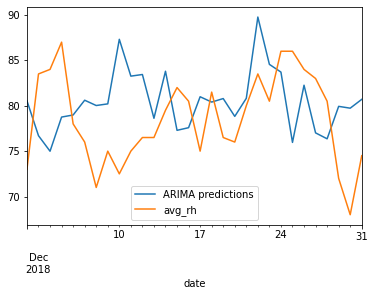

In [195]:
start=len(train)
end=len(train)+len(test)-1

#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-02',end='2018-12-31')
pred=model_fit.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['avg_rh'].plot(legend=True)


In [196]:
pred

2018-12-02    80.544432
2018-12-03    76.699542
2018-12-04    74.992620
2018-12-05    78.752373
2018-12-06    78.981142
2018-12-07    80.606471
2018-12-08    80.023233
2018-12-09    80.204627
2018-12-10    87.312802
2018-12-11    83.258140
2018-12-12    83.437498
2018-12-13    78.617436
2018-12-14    83.797302
2018-12-15    77.291503
2018-12-16    77.582268
2018-12-17    80.988086
2018-12-18    80.402763
2018-12-19    80.788815
2018-12-20    78.827707
2018-12-21    80.815653
2018-12-22    89.764687
2018-12-23    84.554060
2018-12-24    83.703098
2018-12-25    75.960901
2018-12-26    82.258977
2018-12-27    77.011486
2018-12-28    76.357651
2018-12-29    79.930855
2018-12-30    79.730503
2018-12-31    80.702575
Freq: D, Name: ARIMA predictions, dtype: float64

# Evaluation through model statistics

In [197]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt
testMean= test['avg_rh'].mean()
print(round(testMean,4))
rmse=sqrt(mean_squared_error(pred,test['avg_rh']))
print("Root meaan squared error ", round(rmse,4))
mae = mean_absolute_error(test['avg_rh'], pred)
print("meaan absolute error ", round(mae,4))

print('average error :', round(rmse/ testMean * 100,4), '%')
mask = np.isfinite(test['avg_rh']) & np.isfinite(pred)
MAPE = np.mean(np.abs((test['avg_rh'][mask] - pred[mask]) / (test['avg_rh'][mask] ))) * 100
nan_values = np.isnan(MAPE)
print('MAPE:', round(MAPE,4), '%')

78.5667
Root meaan squared error  6.5658
meaan absolute error  5.6958
average error : 8.3569 %
MAPE: 7.3762 %


# training on entire data

In [203]:
train.index.freq = 'D'
model = SARIMAX(df4['avg_rh'], order=(1, 0, 0), seasonal_order=(1, 1, 0, 12))

model_fit = model.fit()

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# making predictions for past and future average rh

In [204]:
from datetime import datetime
import pandas as pd

def predict_rh(res):
    # Get the current date.
    current_date = datetime.now().date()

    # Get the start date and end date of the past 12 months.
    past_start_date = current_date - pd.Timedelta(days=365)
    past_end_date = current_date - pd.Timedelta(days=1)

    # Get the start date and end date of the future 12 months.
    future_start_date = current_date + pd.Timedelta(days=1)
    future_end_date = current_date + pd.Timedelta(days=366)

    # Predict the past 12 months rh values.
    past_rh_values = res.forecast(steps=365)
    past_rh_values.index = pd.date_range(start=past_start_date, end=past_end_date, freq='D')
    past_rh_values= round(past_rh_values,2)
    
    # Predict the future 12 months rh values.
    future_rh_values = res.forecast(steps=366).iloc[-366:]
    future_rh_values.index = pd.date_range(start=future_start_date, end=future_end_date, freq='D')
    future_rh_values=round(future_rh_values,2)
    
    # Return the past 12 months rh values and future 12 months rh values.
    return past_rh_values, future_rh_values


In [205]:
pastRH,futureRH = predict_rh(model_fit)

In [206]:
futureRH

2023-05-08    72.51
2023-05-09    76.92
2023-05-10    77.83
2023-05-11    77.61
2023-05-12    81.31
              ...  
2024-05-03    77.91
2024-05-04    79.66
2024-05-05    78.54
2024-05-06    82.82
2024-05-07    82.87
Freq: D, Name: predicted_mean, Length: 366, dtype: float64

In [207]:
pastRH

2022-05-07    72.51
2022-05-08    76.92
2022-05-09    77.83
2022-05-10    77.61
2022-05-11    81.31
              ...  
2023-05-02    73.63
2023-05-03    77.91
2023-05-04    79.66
2023-05-05    78.54
2023-05-06    82.82
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

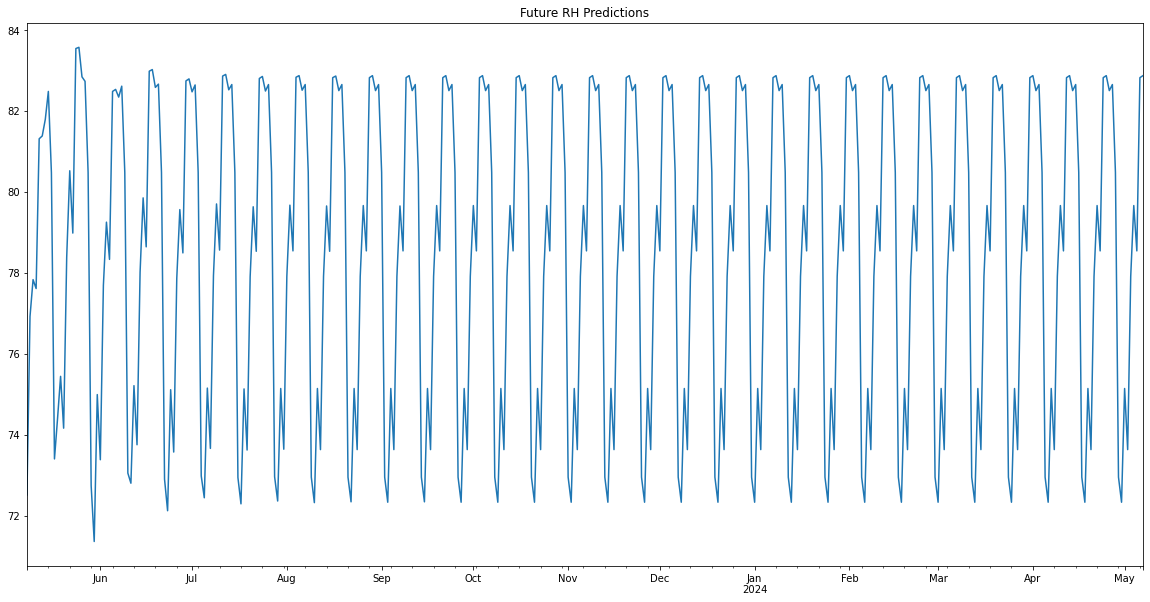

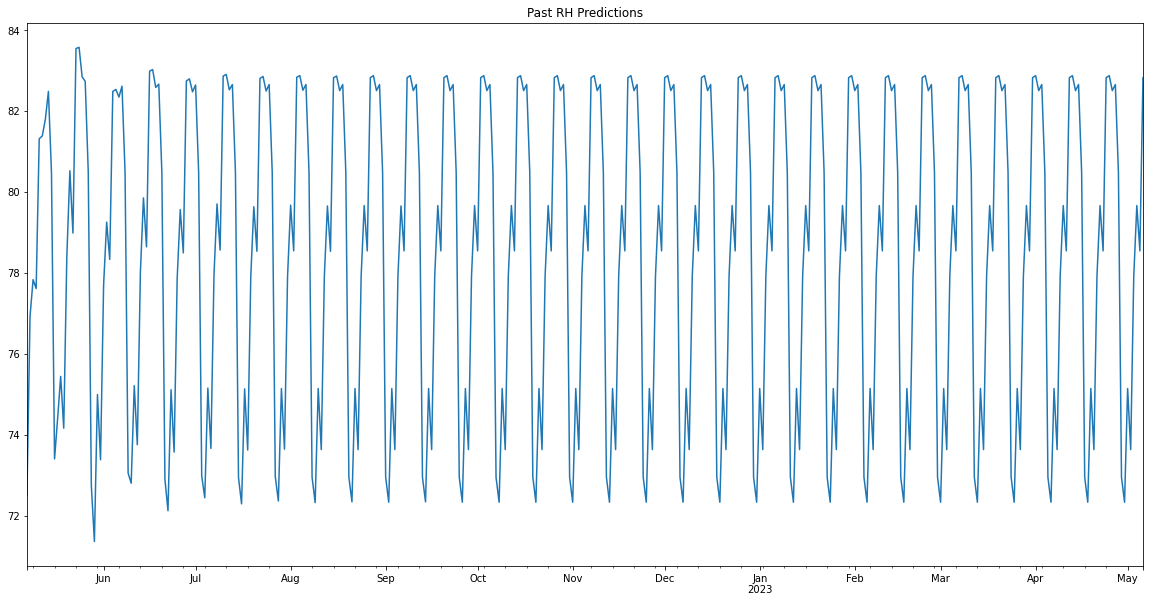

In [208]:
# Plot the future predictions
fig, ax = plt.subplots(figsize=(20, 10))
futureRH.plot(ax=ax)
ax.set_title('Future RH Predictions')

# Plot the past predictions
fig, ax = plt.subplots(figsize=(20, 10))
pastRH.plot(ax=ax)
ax.set_title('Past RH Predictions')

plt.show()

<AxesSubplot:xlabel='date'>

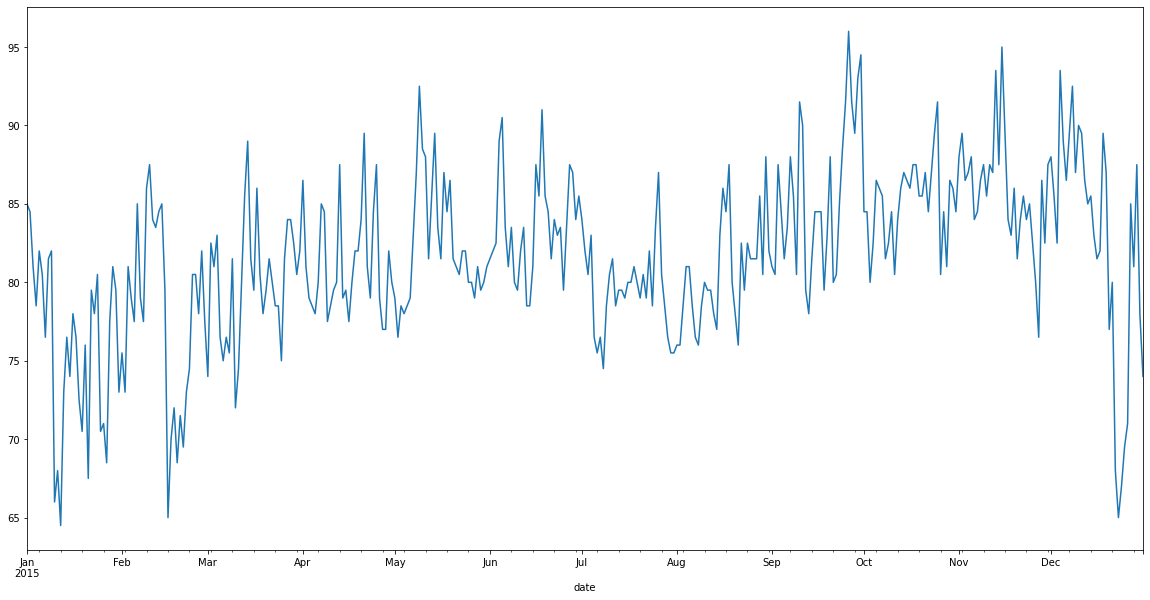

In [209]:
#how the actual 12 month data looks like
df4.loc['2015-01-01':'2015-12-31', 'avg_rh'].plot(x=df4.loc['2015-01-01':'2015-12-31'].index, y='avg_rh', figsize=(20, 10))

In [210]:
import pickle

# assume that your trained model object is named 'model'
with open('average_relhum.pkl', 'wb') as f:
    pickle.dump(model_fit, f)